## 5.3 波動関数の時間発展: RNNの応用

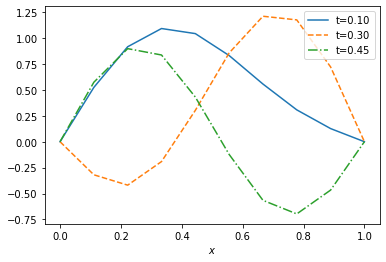

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,1,10)
t=0.1
y1=np.sin(np.pi*x)*np.cos(np.pi*t)+np.sin(2*np.pi*x)*np.cos(4*np.pi*t)

t=0.3
y2=np.sin(np.pi*x)*np.cos(np.pi*t)+np.sin(2*np.pi*x)*np.cos(4*np.pi*t)

t=0.45
y3=np.sin(np.pi*x)*np.cos(np.pi*t)+np.sin(2*np.pi*x)*np.cos(4*np.pi*t)

plt.plot(x,y1,label="t=0.10")
plt.plot(x,y2,label="t=0.30", linestyle="dashed")
plt.plot(x,y3,label="t=0.45", linestyle="dashdot")

plt.xlabel("$x$")
plt.legend()
plt.show()

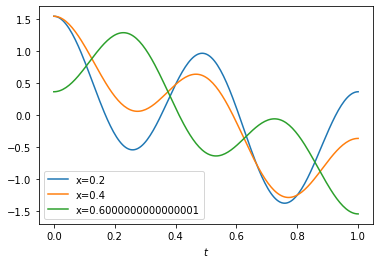

In [28]:
t=np.linspace(0,1,200)
# x=0.2
for i in range(3):
  x=0.2*(i+1)
  y=np.sin(np.pi*x)*np.cos(np.pi*t)+np.sin(2*np.pi*x)*np.cos(4*np.pi*t)
  plt.plot(t,y,label="x="+str(x))

plt.xlabel("$t$")
plt.legend()
plt.show()

In [29]:
Nspace=10
Ntime=200
Ninput=20

x=np.linspace(0,1,Nspace+2)
# print(x)
# 端を除外
x=np.delete(x,0)
x=np.delete(x,-1)
# print(x,len(x))
t=np.linspace(0,1,Ntime)

In [30]:
def psi_re(x,t,c=np.pi):
    psi=np.sin(np.pi*x)*np.cos(c*t)+np.sin(2*np.pi*x)*np.cos(4*c*t)
    return psi

In [31]:
in_data=[]
out_data=[]
for i in range(Ntime-Ninput):
    for j in range(Ninput):
        in_data.append(psi_re(x,t[i+j]))
    out_data.append(psi_re(x,t[i+Ninput]))

In [32]:
print(in_data[0:20])
print(out_data[0])

[array([ 0.82237337,  1.45027281,  1.74557102,  1.66538157,  1.271554  ,
        0.70808889,  0.15388242, -0.23407187, -0.36899118, -0.25890826]), array([ 0.82126069,  1.44839241,  1.74350398,  1.6637619 ,  1.27086912,
        0.70852708,  0.15527539, -0.23219318, -0.36724552, -0.25786579]), array([ 0.81792695,  1.44275846,  1.73731077,  1.65890892,  1.26881676,
        0.70983945,  0.15944832, -0.22656497, -0.36201575, -0.25474267]), array([ 0.81238503,  1.43339265,  1.72701501,  1.65084072,  1.26540372,
        0.71201938,  0.16638332, -0.21721072, -0.35332347, -0.24955174]), array([ 0.80465639,  1.42033107,  1.71265598,  1.63958733,  1.26064129,
        0.71505588,  0.17605061, -0.20416948, -0.34120459, -0.24231435]), array([ 0.79477091,  1.40362402,  1.69428847,  1.62519064,  1.25454523,
        0.71893362,  0.18840869, -0.18749569, -0.32570918, -0.23306026]), array([ 0.78276681,  1.38333584,  1.67198253,  1.60770425,  1.24713571,
        0.72363299,  0.2034045 , -0.167259  , -0.30

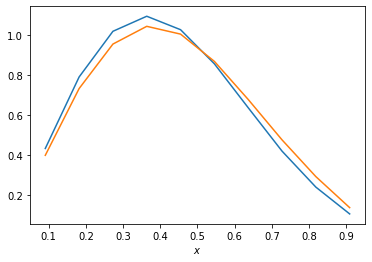

In [33]:
import matplotlib.pyplot as plt

#初期時刻における波動関数
plt.plot(x,in_data[39])
#Ninput後における波動関数
plt.plot(x,out_data[1])

plt.xlabel("$x$")
plt.show()

In [34]:
x_train=np.array(in_data).reshape(Ntime-Ninput,Ninput,Nspace)
#初めの訓練データ
print(x_train[0])
y_train=np.array(out_data).reshape(Ntime-Ninput,Nspace)
#初めの正解データ
print(y_train[0])

[[ 0.82237337  1.45027281  1.74557102  1.66538157  1.271554    0.70808889
   0.15388242 -0.23407187 -0.36899118 -0.25890826]
 [ 0.82126069  1.44839241  1.74350398  1.6637619   1.27086912  0.70852708
   0.15527539 -0.23219318 -0.36724552 -0.25786579]
 [ 0.81792695  1.44275846  1.73731077  1.65890892  1.26881676  0.70983945
   0.15944832 -0.22656497 -0.36201575 -0.25474267]
 [ 0.81238503  1.43339265  1.72701501  1.65084072  1.26540372  0.71201938
   0.16638332 -0.21721072 -0.35332347 -0.24955174]
 [ 0.80465639  1.42033107  1.71265598  1.63958733  1.26064129  0.71505588
   0.17605061 -0.20416948 -0.34120459 -0.24231435]
 [ 0.79477091  1.40362402  1.69428847  1.62519064  1.25454523  0.71893362
   0.18840869 -0.18749569 -0.32570918 -0.23306026]
 [ 0.78276681  1.38333584  1.67198253  1.60770425  1.24713571  0.72363299
   0.2034045  -0.167259   -0.30690128 -0.22182755]
 [ 0.76869051  1.35954463  1.6458232   1.58719319  1.23843719  0.72913021
   0.2209736  -0.14354394 -0.28485862 -0.20866244]


In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,SimpleRNN,LSTM
from tensorflow.keras import optimizers

In [41]:
model=Sequential()
model.add(LSTM(30,input_shape=(Ninput,Nspace),kernel_initializer='random_normal'))
model.add(Dense(Nspace,activation='linear',kernel_initializer='random_normal'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4920      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
Total params: 5,230
Trainable params: 5,230
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mse',optimizer='Adam')
results=model.fit(x_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
18/18 [==============================] - 2s 6ms/step - loss: 0.4308
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2306
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0990
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0356
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0160
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 13/100
18/18 [=================

In [42]:
input_data=x_train[:1]
pred_data=[]
for i in range(Ntime-Ninput):
    out_next=model.predict(input_data)
    pred_data.append(out_next)
    input_data=np.concatenate((input_data.reshape(Ninput,Nspace)[1:],out_next),axis=0).reshape(1,Ninput,Nspace)

1/1 [==============================] - 0s 34ms/step


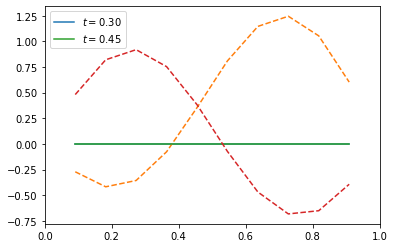

In [44]:
plt.xlim(0,1)
#t=0.30
plt.plot(x,pred_data[40].reshape(Nspace),label="$t=0.30$")
plt.plot(x,psi_re(x,0.30),linestyle="dashed")
#t=0.45
plt.plot(x,pred_data[70].reshape(Nspace),label="$t=0.45$")
plt.plot(x,psi_re(x,0.45),linestyle="dashed")
plt.legend()
plt.show()

In [52]:
params=model.get_weights()
print(params)

[array([[ 0.00197555, -0.03659425, -0.02967956, ...,  0.05150026,
        -0.06638504,  0.01278125],
       [-0.10098984,  0.06000555,  0.01259507, ...,  0.00843347,
        -0.00801821,  0.01244392],
       [ 0.04190124,  0.06654537, -0.10595222, ...,  0.04982458,
         0.02520638,  0.0039844 ],
       ...,
       [ 0.00914322, -0.03496303, -0.11672342, ..., -0.08582051,
        -0.01372749,  0.03039591],
       [-0.078283  ,  0.05041903,  0.08993044, ...,  0.03489088,
         0.00662686, -0.06365627],
       [-0.03523352, -0.00883328,  0.02657373, ...,  0.06486313,
         0.05990724,  0.07648476]], dtype=float32), array([[-0.0083648 ,  0.00560282, -0.13199496, ..., -0.0289775 ,
         0.05920458,  0.11313134],
       [-0.01139855, -0.14632902,  0.06370229, ...,  0.00222411,
        -0.0011625 ,  0.07562491],
       [ 0.11742365, -0.01792278,  0.1493031 , ...,  0.07260264,
        -0.02644753,  0.18186004],
       ...,
       [-0.02571158,  0.03742468,  0.06711682, ...,  0.096